In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
import numpy as np
import glob

In [2]:
def load_data_asc(expression):
    data = None
    for name in glob.glob(expression):
        new_readings = pd.read_csv(name, delimiter = ',', parse_dates=[0], infer_datetime_format=True, na_values='0', header = None)
        if data is None:
            data = new_readings
        else:
            data = pd.concat([data, new_readings])
    return data

In [3]:
data = load_data_asc('dscovr/dsc_fc_summed_spectra_20??_v01.csv')
data.describe()

/tmp/ipykernel_39917/65760716.py:4: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  new_readings = pd.read_csv(name, delimiter = ',', parse_dates=[0], infer_datetime_format=True, na_values='0', header = None)
/tmp/ipykernel_39917/65760716.py:4: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  new_readings = pd.read_csv(name, delimiter = ',', parse_dates=[0], infer_datetime_format=True, na_values='0', header = None)
/tmp/ipykernel_39917/65760716.py:4: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
count,3277440,3.259998e+06,3.259998e+06,3.259998e+06,1.519804e+06,1.582311e+06,1.721032e+06,1.809991e+06,1.922099e+06,2.008476e+06,...,179435.000000,131650.000000,103457.000000,70114.000000,61407.000000,37701.000000,34288.000000,29597.000000,28458.000000,26270.000000
mean,2019-11-24 16:42:18.717042432,8.015442e-02,-1.255092e-01,2.171055e-02,6.904954e+01,2.405151e+01,9.262740e+01,9.369958e+01,1.246801e+02,1.251655e+02,...,410.258331,353.559684,397.477883,381.584273,351.028206,364.846009,364.814574,339.140779,387.293616,339.150626
min,2016-01-01 00:00:00,-2.014280e+01,-3.178510e+01,-3.332440e+01,2.317260e-01,2.317260e-01,2.317260e-01,2.317260e-01,2.317260e-01,2.317260e-01,...,96.621000,63.826300,63.398300,2.675280,2.947210,59.301300,76.164100,65.362400,0.231726,2.469710
25%,2018-01-04 11:59:45,-2.532720e+00,-2.640140e+00,-1.522248e+00,3.139748e+01,2.317260e-01,4.230860e+01,3.983035e+01,5.333525e+01,4.449867e+01,...,392.940000,336.209750,387.257000,372.588500,339.152500,365.221000,370.332750,341.495000,397.712750,343.118500
50%,2020-03-20 23:59:30,1.694915e-01,-2.131885e-01,3.084400e-02,5.893845e+01,1.063320e+01,8.518255e+01,8.183820e+01,1.085690e+02,1.006845e+02,...,421.542000,367.358000,416.448000,409.860500,380.525000,397.663000,397.949500,373.665000,431.640000,381.959500
75%,2021-10-10 23:59:15,2.672278e+00,2.395460e+00,1.553040e+00,9.426612e+01,3.352490e+01,1.191900e+02,1.199030e+02,1.635685e+02,1.546990e+02,...,437.436000,385.025750,432.293000,423.639000,397.720000,418.133000,419.557750,394.069000,451.927750,401.169250
max,2023-05-02 23:59:00,3.304940e+01,2.789380e+01,3.483770e+01,1.675760e+03,1.582720e+03,1.736050e+03,1.496590e+03,1.699290e+03,1.848460e+03,...,1756.870000,1757.440000,1775.960000,1762.550000,1689.330000,1719.110000,1939.020000,1852.740000,1875.050000,1866.960000
std,NaN,3.410268e+00,3.765791e+00,2.982616e+00,6.505515e+01,4.948382e+01,7.784311e+01,8.532521e+01,1.040021e+02,1.253738e+02,...,66.313573,66.450856,72.205229,84.113211,85.454188,99.350766,104.976669,109.746891,118.891957,112.803118


In [4]:
from datetime import timedelta, datetime

data[0]=data[0].map(lambda x: x.timestamp())
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
count,3.277440e+06,3.259998e+06,3.259998e+06,3.259998e+06,1.519804e+06,1.582311e+06,1.721032e+06,1.809991e+06,1.922099e+06,2.008476e+06,...,179435.000000,131650.000000,103457.000000,70114.000000,61407.000000,37701.000000,34288.000000,29597.000000,28458.000000,26270.000000
mean,1.574614e+09,8.015442e-02,-1.255092e-01,2.171055e-02,6.904954e+01,2.405151e+01,9.262740e+01,9.369958e+01,1.246801e+02,1.251655e+02,...,410.258331,353.559684,397.477883,381.584273,351.028206,364.846009,364.814574,339.140779,387.293616,339.150626
std,6.594869e+07,3.410268e+00,3.765791e+00,2.982616e+00,6.505515e+01,4.948382e+01,7.784311e+01,8.532521e+01,1.040021e+02,1.253738e+02,...,66.313573,66.450856,72.205229,84.113211,85.454188,99.350766,104.976669,109.746891,118.891957,112.803118
min,1.451606e+09,-2.014280e+01,-3.178510e+01,-3.332440e+01,2.317260e-01,2.317260e-01,2.317260e-01,2.317260e-01,2.317260e-01,2.317260e-01,...,96.621000,63.826300,63.398300,2.675280,2.947210,59.301300,76.164100,65.362400,0.231726,2.469710
25%,1.515067e+09,-2.532720e+00,-2.640140e+00,-1.522248e+00,3.139748e+01,2.317260e-01,4.230860e+01,3.983035e+01,5.333525e+01,4.449867e+01,...,392.940000,336.209750,387.257000,372.588500,339.152500,365.221000,370.332750,341.495000,397.712750,343.118500
50%,1.584749e+09,1.694915e-01,-2.131885e-01,3.084400e-02,5.893845e+01,1.063320e+01,8.518255e+01,8.183820e+01,1.085690e+02,1.006845e+02,...,421.542000,367.358000,416.448000,409.860500,380.525000,397.663000,397.949500,373.665000,431.640000,381.959500
75%,1.633910e+09,2.672278e+00,2.395460e+00,1.553040e+00,9.426612e+01,3.352490e+01,1.191900e+02,1.199030e+02,1.635685e+02,1.546990e+02,...,437.436000,385.025750,432.293000,423.639000,397.720000,418.133000,419.557750,394.069000,451.927750,401.169250
max,1.683072e+09,3.304940e+01,2.789380e+01,3.483770e+01,1.675760e+03,1.582720e+03,1.736050e+03,1.496590e+03,1.699290e+03,1.848460e+03,...,1756.870000,1757.440000,1775.960000,1762.550000,1689.330000,1719.110000,1939.020000,1852.740000,1875.050000,1866.960000


In [47]:
dbscan=DBSCAN(eps=0.3, min_samples=5)
plasma_2023 = data.iloc[:, [0, 8]].dropna()
plasma_2023 = plasma_2023[plasma_2023.iloc[:,0] > 1672211227]
plasma_2023 = plasma_2023[plasma_2023.iloc[:,0] < 1672608139]
plasma_2023=(plasma_2023-plasma_2023.mean())/plasma_2023.std()
model = dbscan.fit(plasma_2023)

x


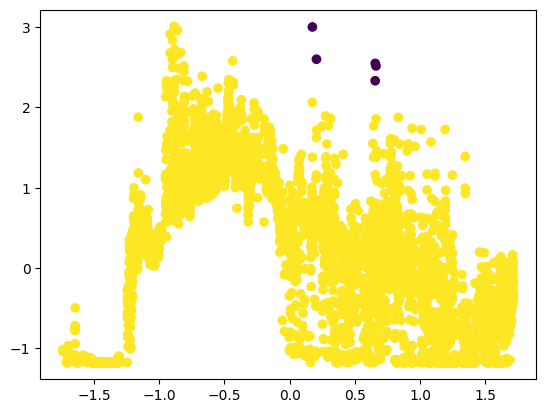

In [48]:
colors = model.labels_
colors
plt.scatter(plasma_2023.iloc[:, 0], plasma_2023.iloc[:, 1], c = colors)